In [2]:
import pandas as pd
import ast  # For safely converting string to list
import csv
import matplotlib.pyplot as plt

In [3]:

# Open the file and process it manually
data = []
with open("../../dataset_preprocessing/MOLHW_preprocess_unicode/big.txt", "r", encoding="utf-8") as file:
    reader = csv.reader(file)  # Read file line by line
    
    for row in reader:
        if not row:
            continue  # Skip empty lines
        
        first_5_columns = row[:5]  # First 5 columns
        last_column = ",".join(row[5:])  # Join remaining columns to reconstruct the coordinate array
        
        try:
            coordinates = ast.literal_eval(last_column)  # Convert string to list safely
        except Exception as e:
            print(f"Error parsing coordinates: {last_column} - {e}")
            coordinates = None  # Handle errors gracefully
        
        data.append(first_5_columns + [coordinates])
df = pd.DataFrame(data, columns=["label", "author",  "width",  "height", "density", "coordinates"])


In [4]:
df

,label,author,width,height,density,coordinates
0,ab,1df87f3d797035f6f919ef8faeaa7b1a,1080,2265,3.0,"[[-1, -1], [0.7425679968102712, 0.0], [0.75426..."
1,ab,2284c343bb9739ad6c124c1022e38ad3,1080,2160,3.0,"[[-1, -1], [0.33827970840834104, 0.0], [0.3577..."
2,ab,2284c343bb9739ad6c124c1022e38ad3,1080,2160,3.0,"[[-1, -1], [0.4377576951907115, 0.0], [0.45196..."
3,ab,a0fc0439c4b0bee243cc9c8cb934fa8b,720,1440,2.0,"[[-1, -1], [0.6360624108658747, 0.0], [0.65164..."
4,aba,37daadd776b8a6eff7f50548c44e7b56,1080,2163,2.55,"[[-1, -1], [0.8663801691206826, 0.0], [0.88342..."
...,...,...,...,...,...,...
995,abwragsan,49fd1eaf7f0378b322dbeacbd61052db,1080,2120,3.0,"[[-1, -1], [0.789420516434811, 0.0], [0.803387..."
996,abwragsan,8380e7e1655517cb0d05b543c0b7ab30,1080,2232,3.0,"[[-1, -1], [0.678776778570047, 0.0], [0.691610..."
997,abwragsan,a465c0443fcf566b1792feffe2a47c08,1080,1920,3.0,"[[-1, -1], [0.7841648681667106, 0.0], [0.79495..."
998,abwragsan,c2fd1ee555fe2b1ca4918d1ee02765be,1080,2208,3.0,"[[-1, -1], [0.5215018805233484, 0.0], [0.53614..."


In [6]:
# Define file paths
input_file = '../../dataset_preprocessing/MOLHW_preprocess_unicode/big.txt'  # Your large input file
output_file = '../../dataset_preprocessing/MOLHW_preprocess_unicode/small.txt'  # File to save the first 1000 rows

# Open the input file in read mode and output file in write mode
with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
    # Read the first 1000 lines
    for i, line in enumerate(infile):
        if i < 1000:
            outfile.write(line)  # Write the line to the output file
        else:
            break  # Stop after 1000 lines

In [7]:

import matplotlib.pyplot as plt

def plot_points(x):
    """
    Plots individual points from a list of coordinate points and connects neighboring points with lines,
    but avoids drawing lines across (-1, -1) separators.
    """

    coords = df.iloc[x]['coordinates'][1:]
    img_width, img_height = int(df.iloc[x]['width']), int(df.iloc[x]['height'])

    # Scale figure
    plt.figure(figsize=(img_width / 150, img_height / 150))  

    # Convert normalized coordinates to image dimensions, keeping (-1, -1) separators
    scaled_coords = [(x * img_width, y * img_height) if (x, y) != (-1, -1) else (-1, -1) for x, y in coords]

    # Separate segments
    segments = []
    current_segment = []

    for point in scaled_coords:
        if point == (-1, -1):  
            if current_segment:  
                segments.append(current_segment)
                current_segment = []
        else:
            current_segment.append(point)

    if current_segment:
        segments.append(current_segment)

    # Plot lines and points with distinct colors
    colors = ['blue', 'green', 'orange', 'purple', 'brown']  # Color options for segments
    for i, segment in enumerate(segments):
        if len(segment) > 1:
            x_vals, y_vals = zip(*segment)
            plt.plot(x_vals, y_vals, color=colors[i % len(colors)], linewidth=2, linestyle='-')  
        
           

    # Flip Y-axis to match image coordinates
    plt.xlim(0, img_width)
    plt.ylim(0, img_height)
    plt.gca().invert_yaxis()

    # Add grid with transparency
    plt.grid(True, linestyle="--", alpha=0.5)

    # Add title
    plt.title(df.iloc[x]['label'], fontsize=12, fontweight='bold')

    plt.show()



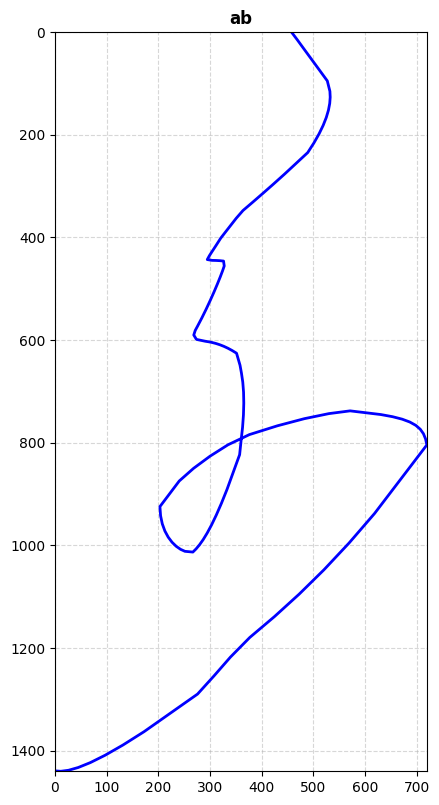

In [9]:
# Plot the points
plot_points(3)

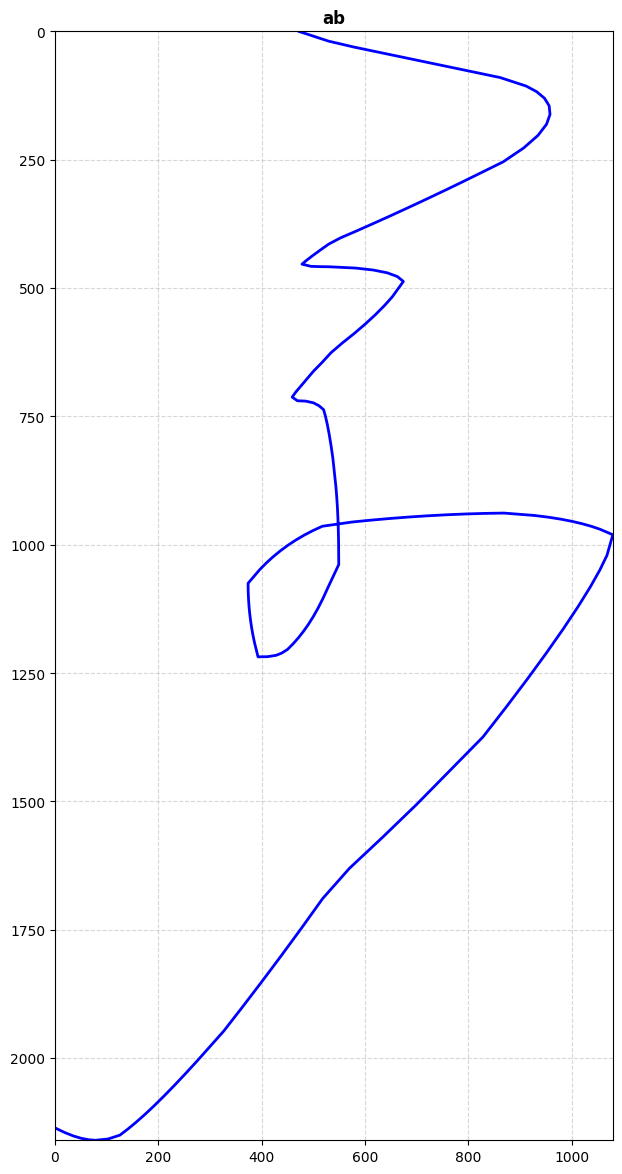

In [38]:
plot_points(2)